<a href="https://colab.research.google.com/github/py2n/BinarySearch/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ایمپورت لایبرری‌های مورد نیاز


*   json
*   pandas
*   SimpSOM
*   sklearn
*   numpy
*   scipy



In [ ]:
!pip install SimpSOM

import json
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np
import numpy as np
# import SimpSOM
from collections import Counter
from scipy import spatial
from sklearn.metrics import mean_squared_error

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp36-none-any.whl size=17086 sha256=ea89d5c5d4c1196d3c5175fd101cc8d9c87098e12775ebf686b5b98a84500952
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


# خواندن و پارس داده‌های کافه شغل
داده‌های اپلیکیشن کافه شغل به صورت چندین جدول در سرور ذخیره شده است و با کلید خارجی می‌توان بین داده‌ها ارتباط برقرار کرد.
جدول‌های موجود در دیتابیس به شرح زیر است.
* user Profile
* last user profile visits
* last user searches

In [ ]:
users_data = pd.DataFrame(columns=['user_id','profile_id','provinceName','province_id','cityName','city_id'
                                   ,'areaName','area_id','titleProfile','descriptionProfile','name','family'
                                   ,'skillName','createDateProfile'])
useful_datas = pd.DataFrame()
data = pd.read_json('drive/MyDrive/Colab Notebooks/request.json')

# تجمیع داده‌ها به فرمتی که قابل استفاده در سیستم پیشنهاد دهنده باشد.
داده‌های مختلف که در جداول مختلف هستند می‌بایست تجمیع شده و در یک جدول قابل دسترسی باشند. در این قسمت اقدام به ساخت یک جدول یکپارچه از کل داده‌ها به صورتی که هر سطر شامل اطلاعات یک کاربر و ستون‌ها شامل مشاغل باشند. اصلی ترین عملیات به منظور تبدیل داده‌های کاربر به فرمت قابل استفاده، ایده شمارش تعداد جستجوهای یک کاربر از یک شغل مثلا آرایشگری و قرار داده عدد بدست آمده در ستون و سطر متناظر با آن شغل که در واقع در این کار ما با یک مسئله امتیاز دهی مواجه می شویم و می‌توانیم همه الگوریتم‌های استاندارد را بر روی آن آزمایش نماییم. 

In [ ]:
for x in data['lstUserData']:
    user_datas = x.get('userProfile')
    visited_profiles = x.get('lstUserProfileVisits')
    search_queries = x.get('lstUserSearch')

    if len(user_datas) != 0 and (len(visited_profiles)!=0 or len(search_queries)!=0):
        user_datas['interests'] = []
        for y in visited_profiles:
            user_datas['interests'].append(y.get('skillName'))
        for y in search_queries:
            user_datas['interests'].append(y.get('skillName'))
        # user_datas['interests'] = set(user_datas['interests'])
        user_datas['interests'] = list(user_datas['interests'])
        a = user_datas['interests']
        a = dict(Counter(a))
        useful_datas = useful_datas.append(a,ignore_index=True)
useful_datas = useful_datas.fillna(0)
all_users_similarity_values = list()
del useful_datas['']
del useful_datas['مشاهده همه پروفایل ها']
del useful_datas['مشاهده همه پروفایل ها ']
print(useful_datas.head())

   حسابدار  ...  فلافلی-سوپرمارکت-فست فود
0      5.0  ...                       0.0
1      0.0  ...                       0.0
2      0.0  ...                       0.0
3      0.0  ...                       0.0
4      0.0  ...                       0.0

[5 rows x 329 columns]


# پیاده‌سازی الگوریتم فاصله اقلیدسی
در سیستم‌های پیشنهاد دهنده از الگوریتم فاصله اقلیدسی استفاده می‌شود. بدین صورت که فاصله هر کاربر از نظر مشاغل مورد توجه با سایر کاربران مقایسه شده و نزدیک ترین فرد به این فرد انتخاب می‌شود و مواردی که فرد مشابه مورد توجه قرار داده‌است و کاربر فعلی آن‌ها را ندیده به این کاربر موارد را پیشنهاد می‌دهیم. این کار را بر اساس میزان فاصله بین دو کاربر که باید حداکثر 6 باشد انجام می‌دهیم. سپس برای یک شماره مشخص مثلا کاربر شماره 5 پیشنهاد‌ها را می‌دهیم و به صورت خروجی در فایل ذخیره می‌کنیم.

In [ ]:
for tst in range(len(useful_datas)):
    most_similar = list()
    test = useful_datas.loc[tst]
    for x in range(len(useful_datas)):
        if x == tst:
            continue
        distance = spatial.distance.euclidean(useful_datas.loc[x], test)
        if distance < 6:
            most_similar.append(x)
    all_users_similarity_values.append(most_similar)
recom_number = 5
mdf = pd.DataFrame()
for x in all_users_similarity_values[recom_number]:
    mdf = mdf.append(useful_datas.loc[x])
ndf = mdf.mean()
f = open('recom.txt','w',encoding="utf-8")
output = str(ndf.nlargest(5).to_string())
print(output)
f.write(output)
f.close()

مشاغل فنی    0.184932
موسیقی       0.178843
مدیر فروش    0.144597
رانندگی      0.140030
آرایشگاه     0.136986


# پیاده سازی الگوریتم کا‌مینز بر روی داده‌‌ها
الگوریتم کامینز یک الگوریتم خوشه بندی می‌باشد که به در این مسئله به منظور دسته بندی و شناسایی افراد مشابه استفاده شده است. برای ارزیابی نتیجه این الگوریتم، ابتدا سطر متناظر با داده فعلی را در دیتاست اصلی استخراج می‌کنیم سپس برچسب کاربر را مشخص می‌کنیم و در نهایت مرکز خوشه را از نتایج الگوریتم استخراج می‌کنیم. در مرحله بعد با استفاده از یکی از معیارهای ارزیابی خطا ، خطای موجود در داده اصلی و مرکز خوشه را محاسبه می کنیم.
در نهایت میانگین این خطاها می‌شود خطای الگوریتم کامینز بر روی داده‌های مسئله کافه شغل.


In [ ]:
kmeans = KMeans(n_clusters=120, random_state=0).fit(useful_datas)
mse = []
for x in range(len(useful_datas)):
    real = useful_datas.iloc[x]
    label = kmeans.labels_[x]
    cluster_center = kmeans.cluster_centers_[label]
    mse.append(mean_squared_error(real.values,cluster_center))
print('میزان خطا با الگوریتم کامینز ' + str(np.average(mse)))


میزان خطا با الگوریتم کامینز 0.026135435094017213


# پیاده سازی االگوریتم اس‌او‌ام
در این الگوریتم که یک نوع از شبکه‌‌های عصبی است ما ابتدا یک شبکه عصبی 60*60 ایجاد کرده سپس داده‌‌ها را به الگوریتم اس‌او‌ام می‌دهیم. بعد از این مرحله نتیجه شبکه آموزش داده‌شده را به یکی از الگوریتم‌‌های خوشه‌بندی همچون کامینز می‌دهیم تا اقدام به خوشه بندی خروجی نماید.

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


/usr/local/lib/python3.6/dist-packages/SimpSOM/__init__.py:459: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (120). Possibly due to duplicate points in X.
  cl= cluster.KMeans(n_clusters=numcl).fit(bmuList)


      --همه مهارت ها--   IT  ...  گل خانه   گچ کار
290                0.0  0.0  ...       0.0     0.0
749                0.0  0.0  ...       0.0     0.0
1208               0.0  0.0  ...       0.0     0.0
1667               0.0  0.0  ...       0.0     0.0
2126               0.0  0.0  ...       0.0     0.0

[5 rows x 329 columns]
      --همه مهارت ها--   IT  ...  گل خانه   گچ کار
310                0.0  0.0  ...       0.0     0.0
769                0.0  0.0  ...       0.0     0.0
1228               0.0  0.0  ...       0.0     0.0
1687               0.0  0.0  ...       0.0     0.0
2146               0.0  0.0  ...       0.0     0.0

[5 rows x 329 columns]
      --همه مهارت ها--   IT  ...  گل خانه   گچ کار
0                  0.0  0.0  ...       0.0     0.0
1                  0.0  0.0  ...       0.0     0.0
2                  0.0  0.0  ...       0.0     0.0
3                  0.0  0.0  ...       0.0     0.0
4                  0.0  0.0  ...       0.0     0.0
...                ...  ...  ...  

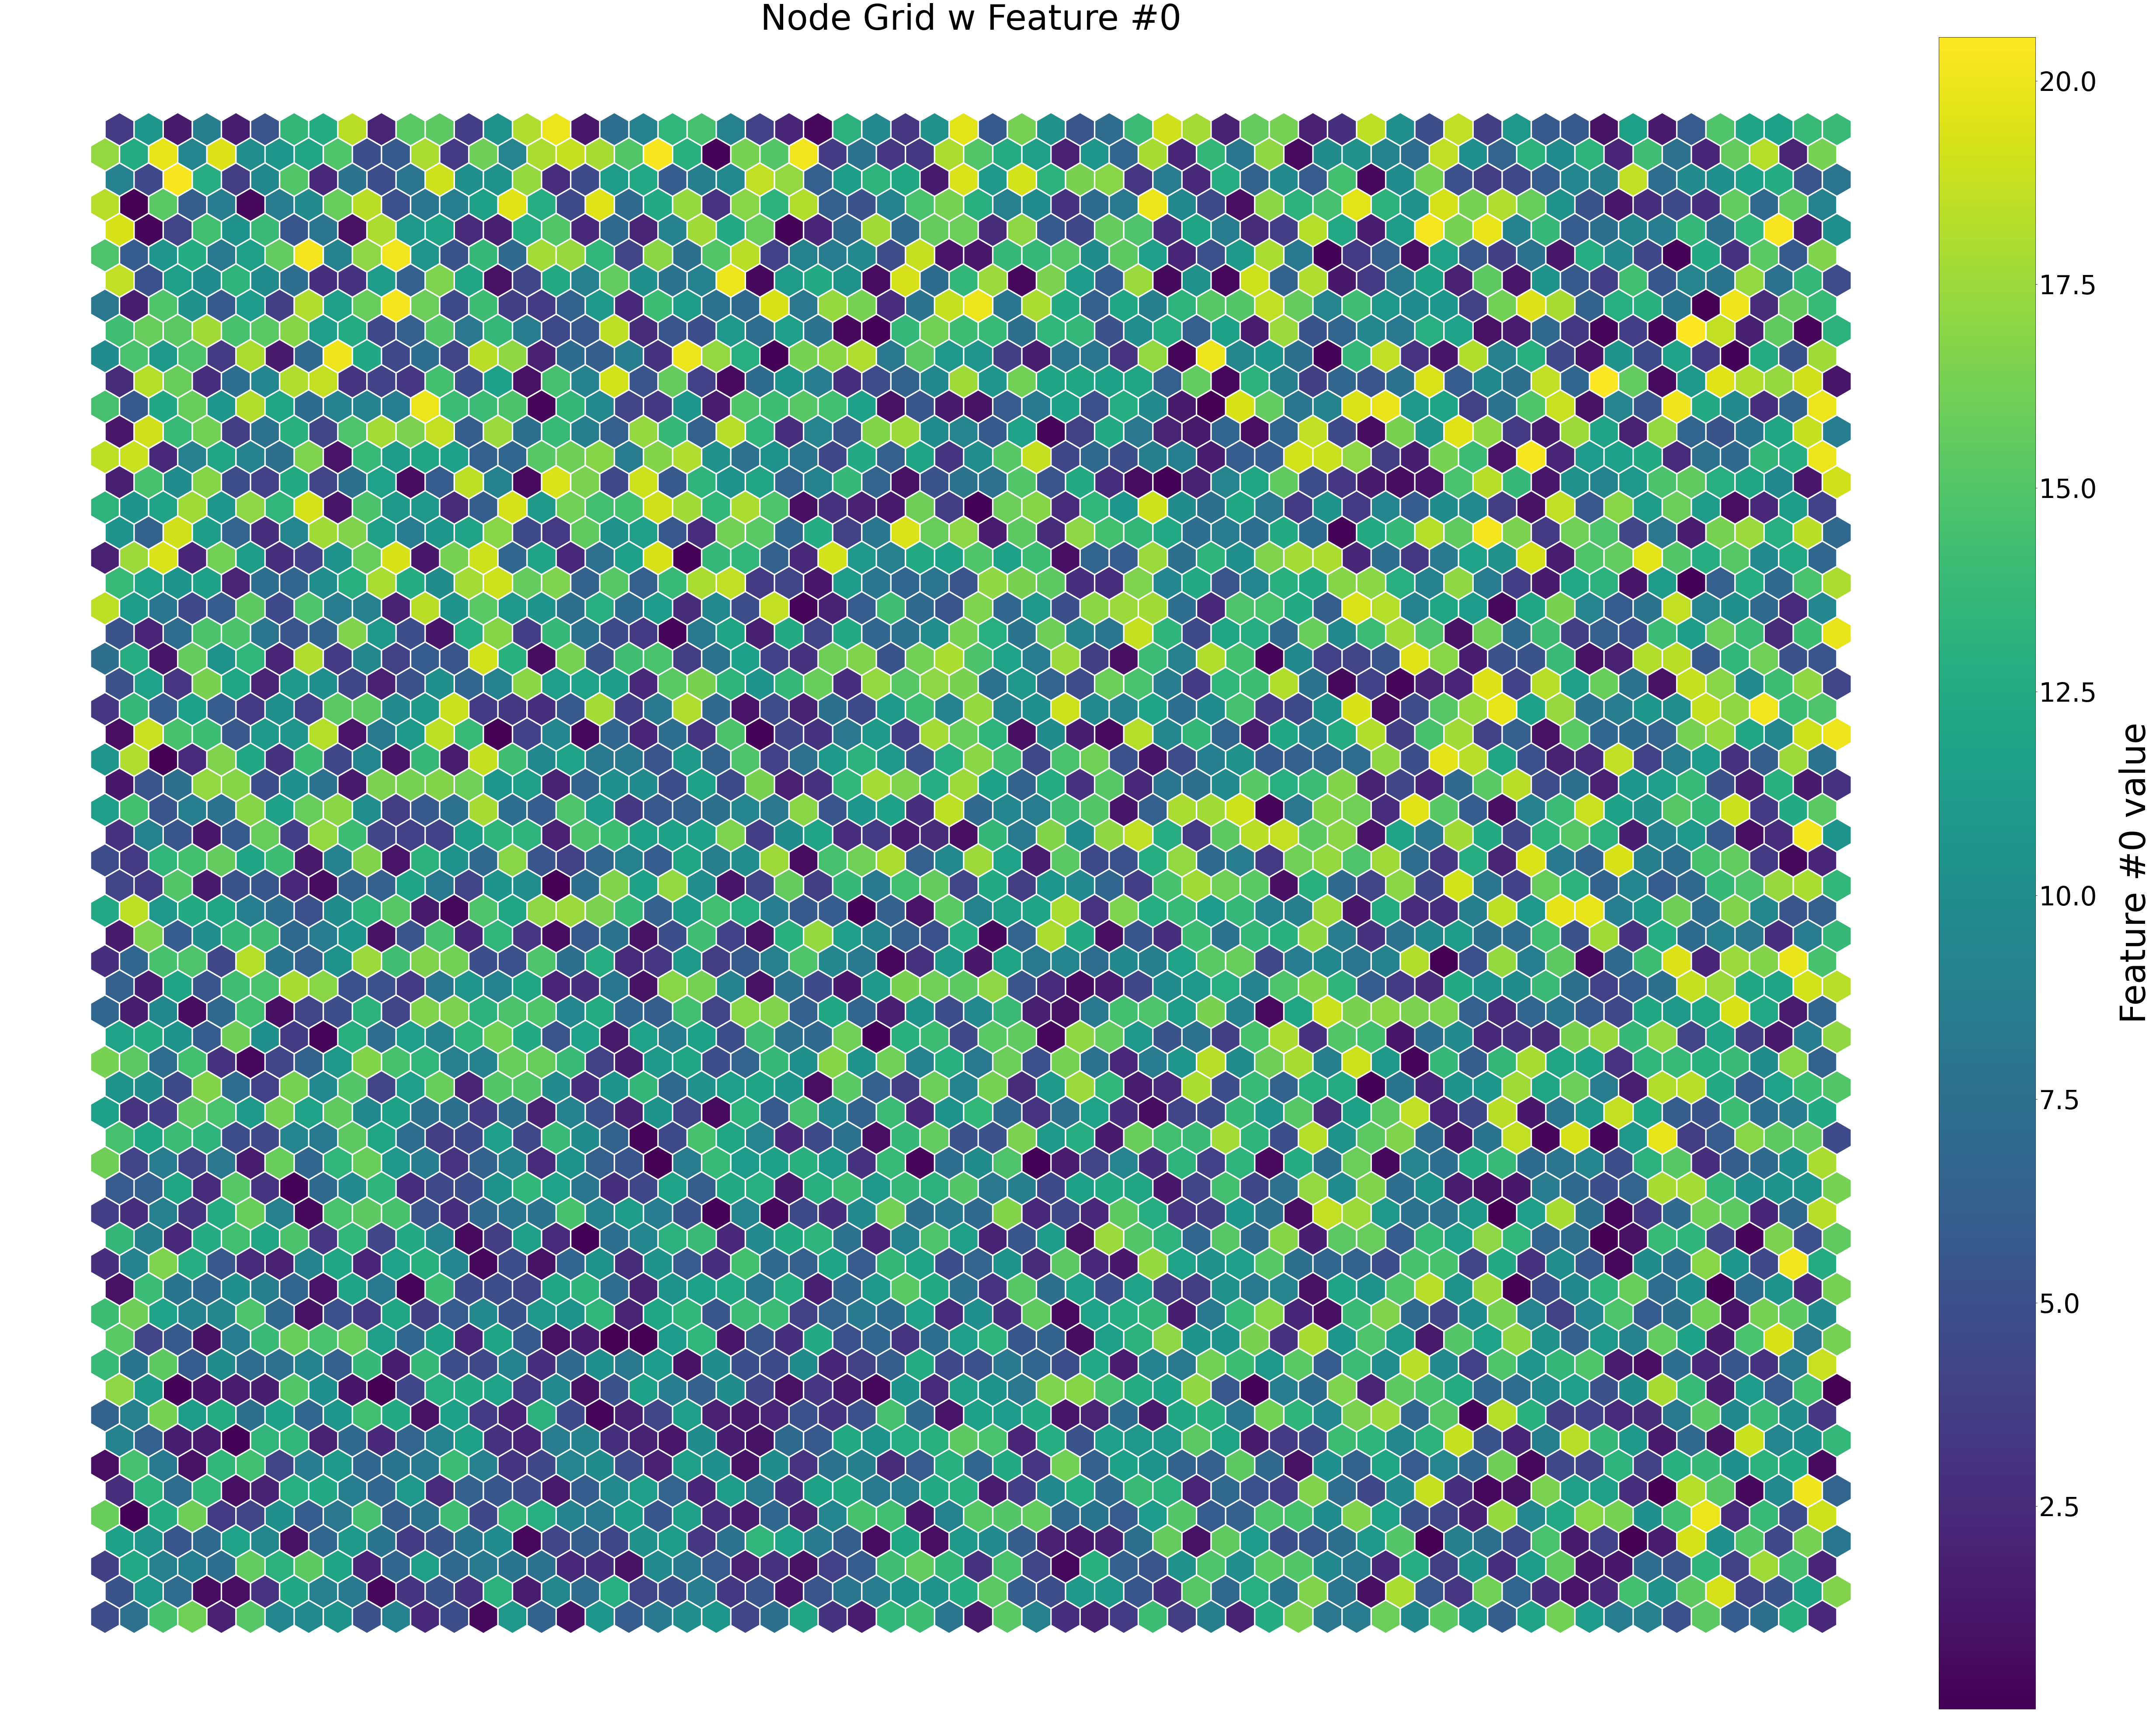

<Figure size 6000x6000 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:

net = sps.somNet(60, 60, useful_datas.values,n_jobs=10)
net.train(0.01, 100)
net.save('filename_weights')
net.nodes_graph(colnum=0)
net.diff_graph()
net.project(useful_datas.values)
result = net.cluster(useful_datas.values, type='KMeans',numcl=120)
centroids = []
for x in result:
    res_list=pd.DataFrame()
    for y in x:
        res_list = res_list.append(useful_datas.iloc[y])
    print(res_list)
    centroids.append(np.average(res_list))
print(centroids)
print(result)





useful_datas.to_html('useful_datas.html')

# پیاده‌سازی الگوریتم ان‌ام‌اف
الگوریتم‌های مختلفی بر روی داده‌های کافه شغل بررسی شده است این الگوریتم‌ها به شرح زیر است
* SVD (singular value decomposition)
* SVD++
* NMF
* knn
* co clustering

از بین الگوریتم‌های یاد شده الگوریتم ان‌ام‌اف بهترین نتیجه را داشته است. پس از اجرای این الگوریتم میزان خطای آن با استفاده از متد کراس ولیدیشن و تقسیم داده به 2 بخش و بررسی دو معیار زیر نتیجه نمایش داده شده است.
* RMSE
* MAE

In [ ]:
!pip install surprise
from surprise import SVD, Reader, SVDpp, NMF, KNNBasic, CoClustering, Dataset
from surprise.model_selection import cross_validate
"""
استفاده از چند الگوریتم استاندارد برای موضوع سیستم پیشنهاد دهنده
 و اجرای آنها بر روی داده‌های استخراج شده
"""

codes = dict()
count = 1
for x in useful_datas.columns:
        codes[x] = count
        count +=1
# rating_datas = list()

"""
تبدیل مجدد داده به فرمت قابل استفاده توسط الگوریتم‌های موجود در لایبرری surprise
"""
mdf  = pd.DataFrame()
max_rate = 0
for x  in useful_datas.itertuples():
    user_id = x[0]
    for y in range(1,len(x)-1):
        if x[y] >0:
            if x[y] > max_rate:
                max_rate = x[y]
            tmp = dict()
            tmp['userid'] = user_id
            tmp['item_id'] = y
            tmp['rating'] = x[y]
            mdf = mdf.append(tmp,ignore_index=True)
        else:
            continue


"""
نرمال سازی داده‌ها به بازه 1 تا 5
"""
from sklearn import preprocessing
x = mdf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1,5))
x_scaled = min_max_scaler.fit_transform(x)
mdf = pd.DataFrame(x_scaled)

"""
ارزیابی الگوریتم بر روی داده‌ها با استفاده از چند الگوریتم بصورت cross validate
MAE : mean absolute error
RMSE : root mean squared error
"""
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(mdf, reader= reader)
algo = NMF(n_factors = 5, n_epochs = 1000)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

     |████████████████████████████████| 11.8MB 8.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670936 sha256=b35a3af115b7d66f5c067459ea89e9a76df17ca9b56e9103e486b8991a5b54ae
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise
Evaluating RMSE, MAE of algorithm NMF on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.2301  1.2292  1.2297  0.0004  
MAE (testset)     1.0599  1.0588  1.0594  0.0006  
Fit time          6.72    6.72    6.72    0.00    
Test time         0.05    0.06    0.05    0.00    


{'fit_time': (6.7204909324646, 6.720643997192383),
 'test_mae': array([1.05994264, 1.05876209]),
 'test_rmse': array([1.23012526, 1.22923718]),
 'test_time': (0.049028873443603516, 0.05710268020629883)}